In [2]:
import pandas as pd
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_feature = pd.read_csv('training_set_features.csv', index_col=False)
df_label = pd.read_csv('training_set_labels.csv', index_col=0)

In [4]:
df_feature.replace('',np.nan)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [5]:
# df_feature.join(df_label)
df_feature['h1n1_vaccine'] = df_label['h1n1_vaccine']
df_feature['seasonal_vaccine'] = df_label['seasonal_vaccine']

In [6]:
df_feature = df_feature.drop(columns='respondent_id',axis=1)

In [7]:
df_feature.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [8]:
df_feature.isnull().sum(axis=0)

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [9]:
df_label.describe()

,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000
mean,0.212454,0.465608
std,0.409052,0.498825
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

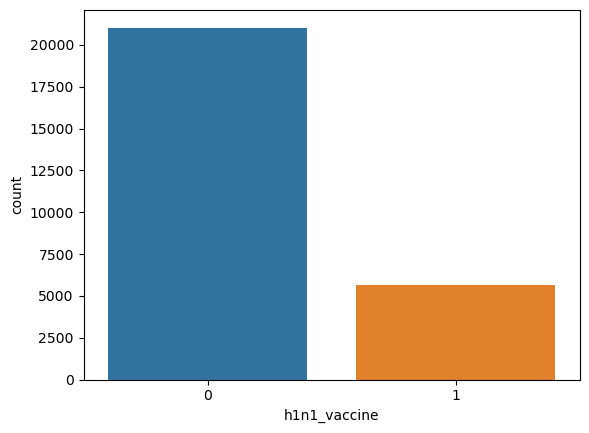

In [10]:
sns.countplot(x=df_label['h1n1_vaccine'], data=df_label)

<AxesSubplot:xlabel='seasonal_vaccine', ylabel='count'>

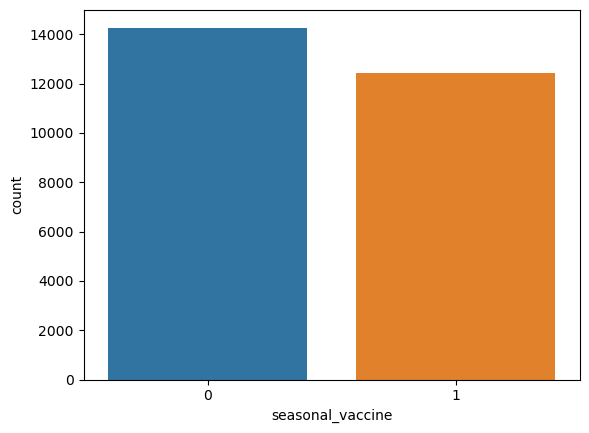

In [11]:
sns.countplot(x=df_label['seasonal_vaccine'], data=df_label)

In [12]:
print(df_feature['age_group'].unique())

print(df_feature['education'].unique())

print(df_feature['race'].unique())

print(df_feature['sex'].unique())

print(df_feature['income_poverty'].unique())

print(df_feature['marital_status'].unique())
print(df_feature['rent_or_own'].unique())
print(df_feature['employment_status'].unique())
print(df_feature['hhs_geo_region'].unique())
print(df_feature['census_msa'].unique())

['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
['< 12 Years' '12 Years' 'College Graduate' 'Some College' nan]
['White' 'Black' 'Other or Multiple' 'Hispanic']
['Female' 'Male']
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' nan]
['Not Married' 'Married' nan]
['Own' 'Rent' nan]
['Not in Labor Force' 'Employed' 'Unemployed' nan]
['oxchjgsf' 'bhuqouqj' 'qufhixun' 'lrircsnp' 'atmpeygn' 'lzgpxyit'
 'fpwskwrf' 'mlyzmhmf' 'dqpwygqj' 'kbazzjca']
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


In [13]:
conditions = [(df_feature['age_group']=='18 - 34 Years'),(df_feature['age_group']=='35 - 44 Years'),(df_feature['age_group']=='45 - 54 Years'),(df_feature['age_group']=='55 - 64 Years'),(df_feature['age_group']=='65+ Years')]
choices = [0,1,2,3,4]
df_feature['age_qua'] = np.select(conditions,choices,default=5)

edu_conditions = [(df_feature['education'] == '< 12 Years'),(df_feature['education'] == '12 Years'),(df_feature['education'] == 'College Graduate'),(df_feature['education'] == 'Some College')]
edu_choices = [0,1,2,3]
df_feature['education_qua'] = np.select(edu_conditions,edu_choices,default=4)

race_conditions = [(df_feature['race'] == 'White'),(df_feature['race'] == 'Black'),(df_feature['race'] == 'Other or Multiple'),(df_feature['race'] == 'Hispanic')]
race_choices = [0,1,2,3]
df_feature['race_qua'] = np.select(race_conditions,race_choices,default=4)

df_feature['sex_qua'] = np.where((df_feature['sex'] == 'Male'),1,0)

income_conditions = [(df_feature['income_poverty'] == 'Below Poverty'),(df_feature['income_poverty'] == '<= $75,000, Above Poverty'),(df_feature['income_poverty'] == '> $75,000')]
income_choices = [0,1,2]
df_feature['income_qua'] = np.select(income_conditions,income_choices,default=3)

marital_conditions = [(df_feature['marital_status'] == 'Not Married'),(df_feature['marital_status'] == 'Married')]
marital_choices = [0,1]
df_feature['marital_qua'] = np.select(marital_conditions,marital_choices,default=2)

rent_conditions = [(df_feature['rent_or_own'] == 'Own'),(df_feature['rent_or_own'] == 'Rent')]
rent_choices = [0,1]
df_feature['rent_qua'] = np.select(rent_conditions,rent_choices,default=2)

employment_conditions = [(df_feature['employment_status'] == 'Not in Labor Force'),(df_feature['employment_status'] == 'Employed'),(df_feature['employment_status'] == 'Unemployed')]
employment_choices = [0,1,2]
df_feature['rent_qua'] = np.select(employment_conditions,employment_choices,default=3)

region_conditions = [df_feature['hhs_geo_region'] == 'oxchjgsf',df_feature['hhs_geo_region'] == 'bhuqouqj',df_feature['hhs_geo_region'] == 'qufhixun',df_feature['hhs_geo_region'] == 'lrircsnp',df_feature['hhs_geo_region'] == 'atmpeygn',df_feature['hhs_geo_region'] == 'lzgpxyit',df_feature['hhs_geo_region'] == 'fpwskwrf',df_feature['hhs_geo_region'] == 'mlyzmhmf',df_feature['hhs_geo_region'] == 'dqpwygqj',df_feature['hhs_geo_region'] == 'kbazzjca']
region_choices = [0,1,2,3,4,5,6,7,8,9]
df_feature['region_qua'] = np.select(region_conditions,region_choices,default=10)

msa_conditions = [(df_feature['census_msa'] == 'Non-MSA'),(df_feature['census_msa'] == 'MSA, Not Principle  City'),(df_feature['census_msa'] == 'MSA, Principle City')]
msa_choices = [0,1,2]
df_feature['msa_qua'] = np.select(msa_conditions,msa_choices,default=3)

<AxesSubplot:xlabel='hhs_geo_region', ylabel='income_qua'>

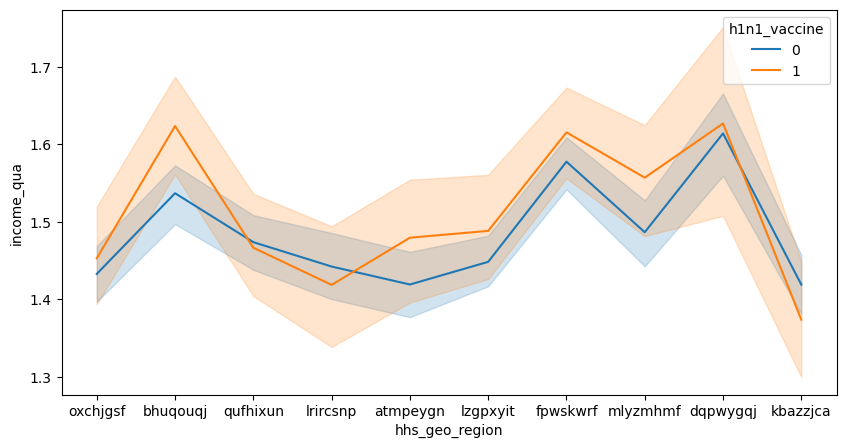

In [14]:
fig,axs = plt.subplots(figsize=(10,5))
sns.lineplot(data=df_feature,x='hhs_geo_region',y='income_qua',hue='h1n1_vaccine',ax=axs)

In [15]:
df_feature.drop(columns=['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','employment_industry','employment_occupation','health_insurance','hhs_geo_region','census_msa'],axis=1,inplace=True)

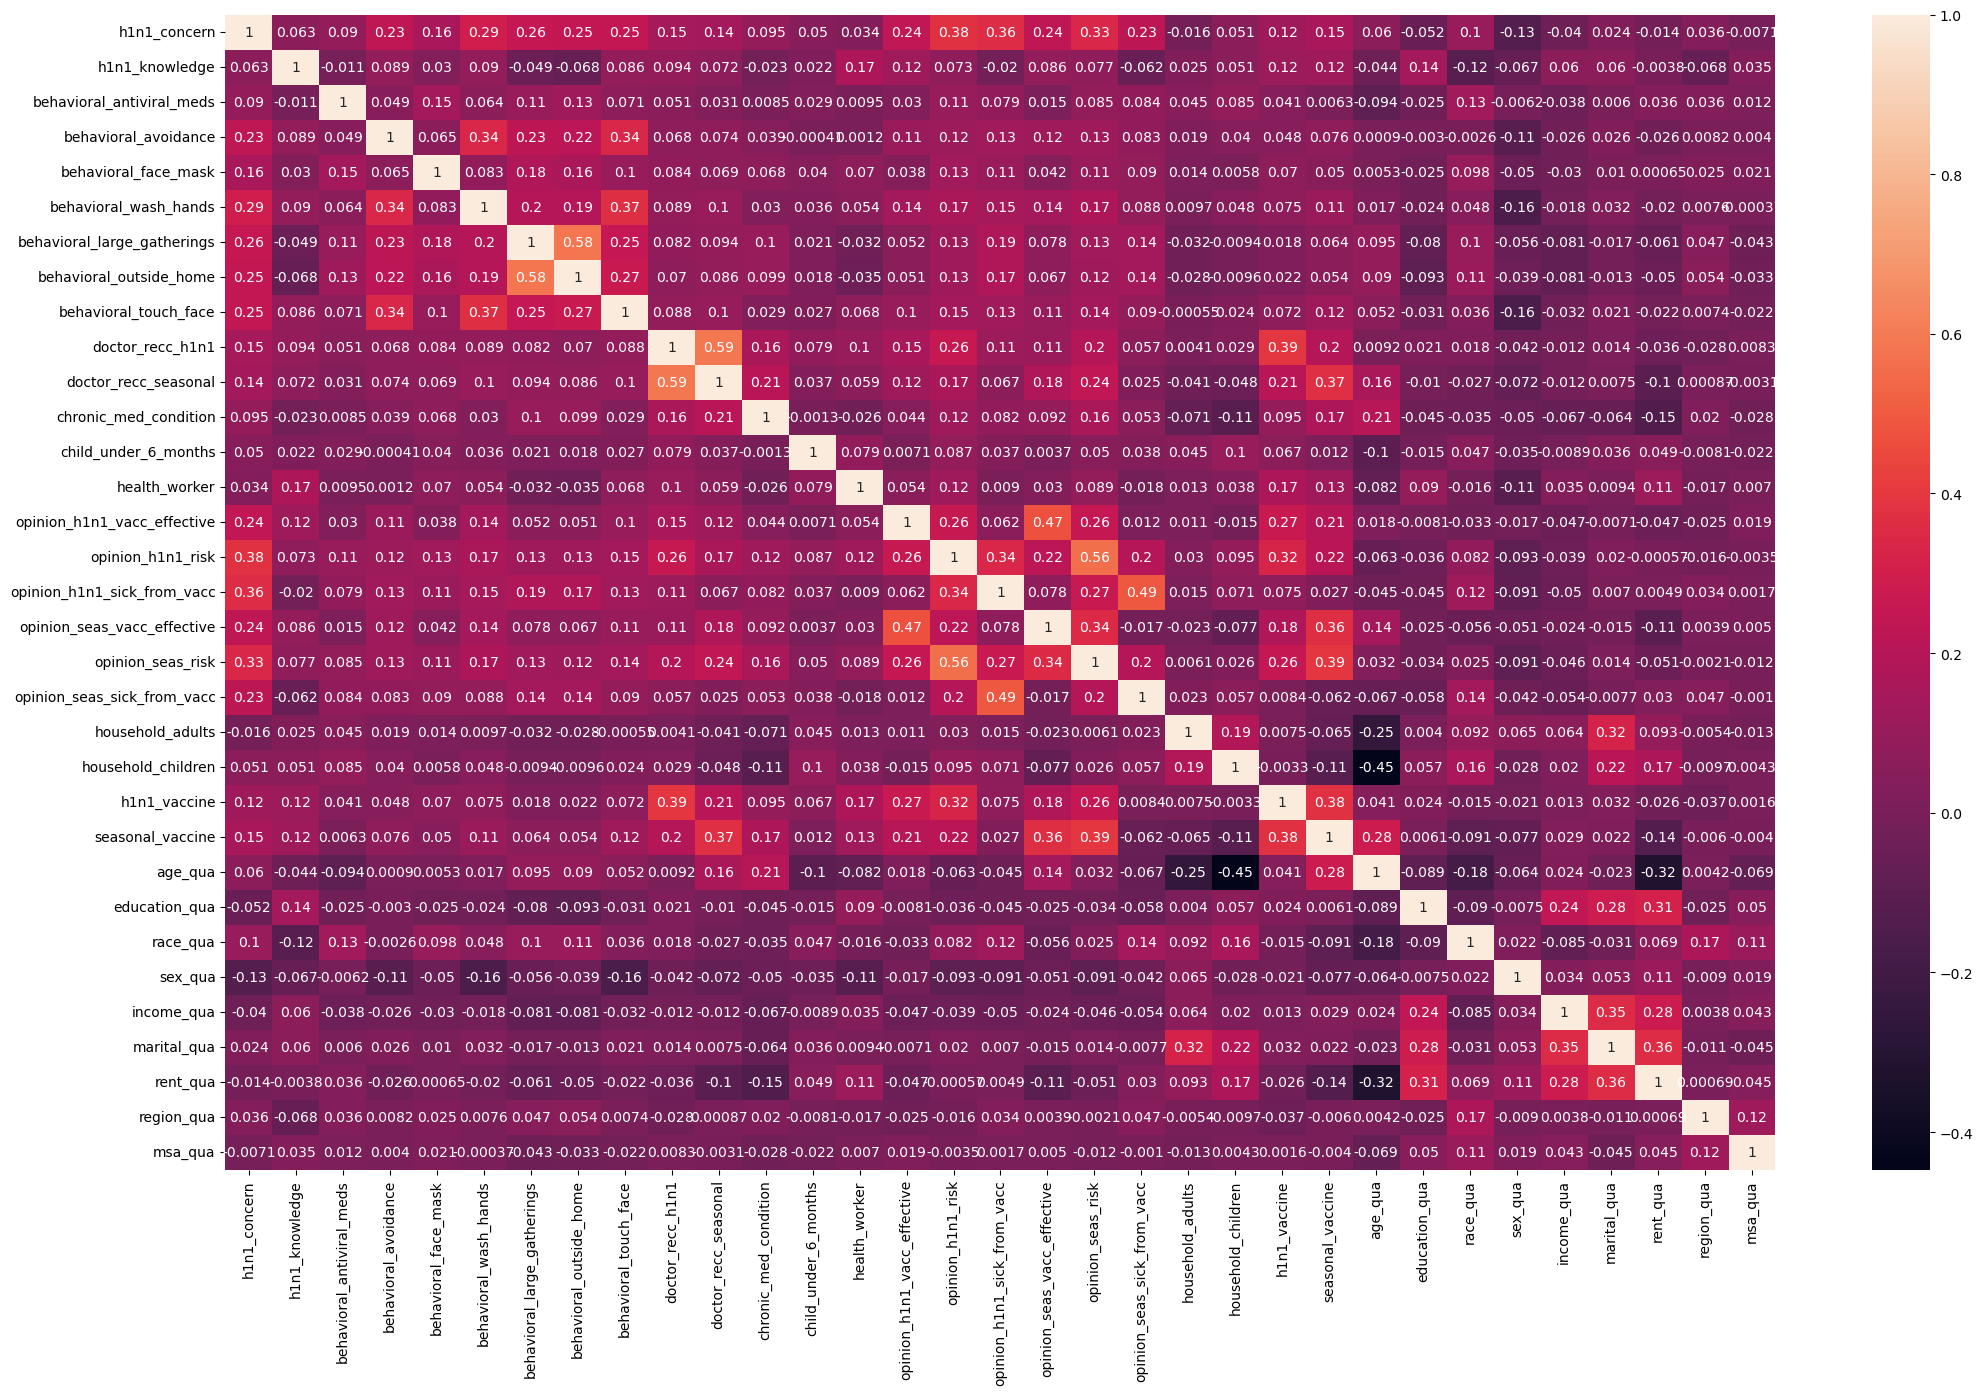

In [16]:
plt.figure(figsize=(25,15))
sns.heatmap(df_feature.corr(),annot=True)
plt.show()

In [17]:
df_feature = df_feature.dropna(thresh=4)
df_feature[df_feature.isna().any(axis=1)]

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,seasonal_vaccine,age_qua,education_qua,race_qua,sex_qua,income_qua,marital_qua,rent_qua,region_qua,msa_qua
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0,0,2,0,1,1,0,1,2,1
42,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,1,0,1,1,1,1,0,0
44,NaN,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,3,2,0,0,1,0,1,6,2
57,3.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1,3,0,0,1,3,1,1,9,2
64,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0,2,4,2,0,3,2,3,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26682,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,...,0,2,2,0,0,2,1,1,3,1
26687,3.0,2.0,0.0,NaN,1.0,1.0,0.0,0.0,1.0,0.0,...,1,4,1,0,0,1,0,0,5,1
26692,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,...,0,0,0,0,0,0,0,1,4,0
26695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0,0,3,0,1,2,0,1,3,2


In [18]:
train_data = df_feature.dropna()

In [21]:
imp = IterativeImputer(random_state=0,initial_strategy="most_frequent")
imp.fit(train_data)

IterativeImputer(initial_strategy='most_frequent', random_state=0)

In [22]:
df_feature[df_feature.isna().any(axis=1)]

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,seasonal_vaccine,age_qua,education_qua,race_qua,sex_qua,income_qua,marital_qua,rent_qua,region_qua,msa_qua
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0,0,2,0,1,1,0,1,2,1
42,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,1,0,1,1,1,1,0,0
44,NaN,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,3,2,0,0,1,0,1,6,2
57,3.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1,3,0,0,1,3,1,1,9,2
64,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0,2,4,2,0,3,2,3,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26682,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,...,0,2,2,0,0,2,1,1,3,1
26687,3.0,2.0,0.0,NaN,1.0,1.0,0.0,0.0,1.0,0.0,...,1,4,1,0,0,1,0,0,5,1
26692,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,...,0,0,0,0,0,0,0,1,4,0
26695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0,0,3,0,1,2,0,1,3,2


In [23]:
data = imp.transform(df_feature)

In [24]:
data = data.round()

In [25]:
data[2]

array([1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 3., 1., 1.,
       4., 1., 2., 2., 0., 0., 0., 0., 2., 0., 1., 1., 0., 1., 2., 1.])

In [ ]:
from sklearn.ensemble import RandomForestRegressor



In [ ]:
df_pump = pd.read_csv('4910797b-ee55-40a7-8668-10efd5c1b960.csv')

In [ ]:
df_pump.describe()

In [ ]:
df_pump.isnull().sum(axis=0)